In [74]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [77]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [78]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [79]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [80]:
# Save references to each table
Station = base.classes.station
Measurement = base.classes.measurement

In [81]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [82]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
most_recent_date.date

'2017-08-23'

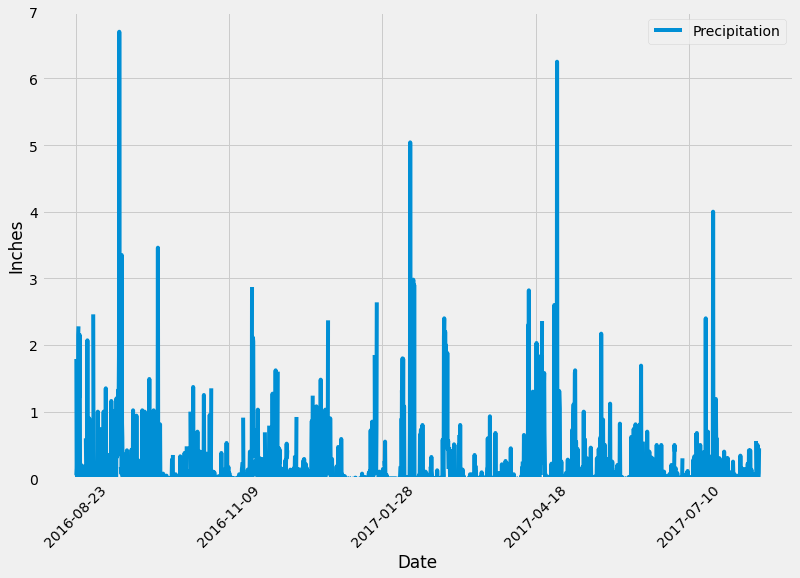

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.datetime.strptime(most_recent_date.date, '%Y-%m-%d').date()
# Calculate the date one year from the last date in data set.
date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(func.strftime('%Y-%m-%d', Measurement.date) >= date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(scores, columns=['Date', 'Precipitation'])
results_df.set_index('Date', inplace=True)


# Sort the dataframe by date
results_sorted_df = results_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
results_sorted_df.plot(rot=45, figsize=(12,8))
plt.legend(loc = 'upper right')
plt.ylim(0,7)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()



In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_sorted_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [86]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_list = [Measurement.station, func.count(Measurement.station)]

active_stations = session.query(*active_list).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).first().station

session.query(*active_list).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_list = [Measurement.station,
            func.min(Measurement.tobs),
            func.max(Measurement.tobs),
            func.avg(Measurement.tobs)]

query = session.query(*temp_list).group_by(Measurement.station).filter(Measurement.station == active_stations).all()

print(f"The most active station id is {query[0][0]}.")
print(f"The lowest temperature for {query[0][0]} is {query[0][1]}")
print(f"The highest temperature for {query[0][0]} is {query[0][2]}")
print(f"The average temperature for {query[0][0]} is {query[0][3]}")

The most active station id is USC00519281.
The lowest temperature for USC00519281 is 54.0
The highest temperature for USC00519281 is 85.0
The average temperature for USC00519281 is 71.66378066378067


Text(0.5, 0, 'Temperature')

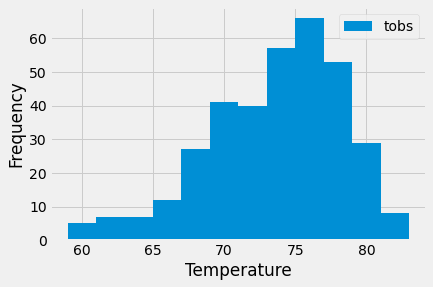

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
months_12 = session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date >= date).all()

#Create Dataframe
months_12_df = pd.DataFrame(months_12, columns=['Station', 'tobs'])

# Create Histogram
months_12_df.plot(kind = "hist", bins = 12)
plt.xlabel('Temperature')

# Close session

In [89]:
# Close Session
session.close()